# Text Analyst and Text Classification

In [1]:
import pandas as pd
import tweepy
from tweepy import *
import xlsxwriter
from twython import Twython
import re
import glob

import pandas as pd
import re
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

import nltk
#nltk.download()
from nltk.corpus import stopwords
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from datetime import datetime

scraping twitter

untuk mendapatkan kode consumer_key, consumer_secret, access_token, acces_token_secret bisa bikin aku di link : https://developer.twitter.com/en/apps

In [2]:
consumer_key = 'xxxxxxxxxxxxxxx'
consumer_secret = 'xxxxxxxxxxxxxxxxxxx'
access_token = 'xxxxxxxxxxxxxx'
access_token_secret = 'xxxxxxxxxxx'

In [3]:
# Authorization to consumer key and consumer secret 
auth = OAuthHandler(consumer_key, consumer_secret) 

# Access to user's access key and access secret 
auth.set_access_token(access_token, access_token_secret) 

# Calling api 
api = tweepy.API(auth, wait_on_rate_limit=True)

# Twitter
twitter = Twython(consumer_key, consumer_secret, access_token, access_token_secret)

In [4]:
def get_tweets_by_keyword(listOfTweets, keyword, numOfTweets):
    # Iterate through all tweets containing the given word, api search mode
    for tweet in tweepy.Cursor(api.search, lang = "id", q=keyword+" -filter:retweets", tweet_mode="extended").items(numOfTweets):
        t = tweet.full_text
        listOfTweets.append(t)   
    return listOfTweets

def get_tweets_by_account(listOfTweets, keyword, numOfTweets):
    user_timeline = twitter.get_user_timeline(screen_name=keyword, count = numOfTweets, tweet_mode = "extended")   
    for tweet in user_timeline:
        t = tweet['full_text']
        listOfTweets.append(t)       
    return listOfTweets

In [5]:
kata_kunci = []
keyword = ['covid']

for kd in keyword:
    konten = get_tweets_by_keyword(kata_kunci, kd, 100)
    
akun = []
dewasa = ['@jokowi', '@aniesbaswedan', '@NarasiNewsroom', '@kumparan',  '@detikcom' ]
for d in dewasa:
    acc_dewasa = get_tweets_by_account(akun, d, 100)

In [6]:
kata_kunci [:20]

['Kabar terbaru:\n\nSatgas Penanganan\xa0Covid-19 menemukan enam sampel dengan virus corona mutasi B117 yang tersebar di tiga provinsi.\n\nJuru bicara pemerintah untuk penanganan Covid-19, Wiku Adisasmito menjelaskan bahwa tiga diantara sampel tersebut berasal dari wilayah DKI Jakarta. https://t.co/8YL0eYgFSV',
 'Operasi Yustisi Protokol Kesehatan dan Pengawasan PPKM Mikro guna menekan laju penularan Virus Covid-19 serra pembagian masker kepada masyarakat di wilayah Kab. Kebumen. https://t.co/urtA4jQR74',
 '161 Jurnalis dan pekerja media di Kota Padang Sumatera Barat pagi ini Rabu (10/3) mengikuti vaksinasi Covid-19 untuk memperkuat imun sehingga tidak terpapar Covid-19. 📸 Mst\n\n#ElshintaEdisiPagi https://t.co/2ZfUVbzZzw',
 'Sosialisasi PPKM dan 5 M untuk mencegah penyebaran virus covid-19. Dengan menerapkan protokol kesehatan akan mengurangi penularan virus, tetap memakai masker, mencuci tangan, menjaga jarak, menghindari kerumuman dan mengurangi mobilitas https://t.co/3BZjSiHW8D',
 

In [7]:
akun[:20]

['Sebuah pesawat KLM tiba di Bandara Soekarno-Hatta  kemarin sore, membawa 1,1 juta dosis vaksin siap pakai AstraZeneca. \n\nIni adalah pengiriman awal dari 11,7 juta vaksin yang kita peroleh melalui skema kerja sama multilateral lewat inisiatif COVAX Facility. https://t.co/GqSIOzL46b',
 'Tak ada pertunjukan, tur, sampai festival musik dalam satu tahun ini. Tapi saya tahu, pemusik-pemusik Indonesia tak mudah patah semangat.\n\nKolaborasi dengan platform digital mereka jadikan sarana untuk menjangkau para penikmat musik dan sebagai ruang baru untuk berkarya. https://t.co/WPR4P1QtnZ',
 'BPPT harus mampu memiliki jejaring luas dan menjadi lembaga akuisisi teknologi maju dari manapun, selama belum bisa diproduksi di dalam negeri.\n\nSelain itu, BPPT harus turut ambil bagian dalam pengembangan kecerdasan buatan dan menjadi pusat kecerdasan teknologi Indonesia. https://t.co/il12UZSOiO',
 'Selama pandemi ini misalnya, akselerasi inovasi bisa kita lihat di bidang kesehatan seperti ventilator u

text analytics and text classification

In [8]:
data = pd.read_csv("data_shopee.csv", delimiter=",", encoding = 'iso-8859-1')
data.tail()

,text,label
3251,like you too,love
3252,buat jodohku shareloc dong pengen ketemu,love
3253,kalo pada dasarnya pengen pulang udah pasti la...,love
3254,yamauuuu kalo suka sama suka,love
3255,sayang yang sudah berjuang,love


clean multiple spaces with single space

In [9]:
data['text'] = data['text'].str.replace('\s+',' ')
data.tail()

E:\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,text,label
3251,like you too,love
3252,buat jodohku shareloc dong pengen ketemu,love
3253,kalo pada dasarnya pengen pulang udah pasti la...,love
3254,yamauuuu kalo suka sama suka,love
3255,sayang yang sudah berjuang,love


Clean the punctuation

In [10]:
data['text'] = data['text'].str.replace('[^\w\s-]','')
data.tail()

E:\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


,text,label
3251,like you too,love
3252,buat jodohku shareloc dong pengen ketemu,love
3253,kalo pada dasarnya pengen pulang udah pasti la...,love
3254,yamauuuu kalo suka sama suka,love
3255,sayang yang sudah berjuang,love


Change data to be lowercase or uppercase

In [11]:
data['text'] = data['text'].apply(lambda x: x.lower())
data.tail()

,text,label
3251,like you too,love
3252,buat jodohku shareloc dong pengen ketemu,love
3253,kalo pada dasarnya pengen pulang udah pasti la...,love
3254,yamauuuu kalo suka sama suka,love
3255,sayang yang sudah berjuang,love


stopword by NLTK

In [12]:
print(stopwords.fileids())

['arabic', 'azerbaijani', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik', 'turkish']


In [13]:
list_stopwords = set(stopwords.words('indonesian'))
len(list_stopwords)

757

In [14]:
stop = list_stopwords
data['text-stp-nltk'] = data['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
data.head()

,text,label,text-stp-nltk
0,foto nya di editin sama minta di tag tapi takut,afraid,foto nya editin tag takut
1,kok serem ya,afraid,serem ya
2,takut liat fotonya pocong,afraid,takut liat fotonya pocong
3,serem udah tua soalnya,afraid,serem udah tua
4,hiiiii,afraid,hiiiii


stopword by sastrawi

In [15]:
factory = StopWordRemoverFactory()
stopwords = factory.get_stop_words()
len(stopwords)

126

In [16]:
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()

data['text-stp-sastrawi'] = data['text'].apply(lambda x: " ".join(stopword.remove(x) for x in x.split() ))
data.head()

,text,label,text-stp-nltk,text-stp-sastrawi
0,foto nya di editin sama minta di tag tapi takut,afraid,foto nya editin tag takut,foto nya editin sama minta tag takut
1,kok serem ya,afraid,serem ya,kok serem
2,takut liat fotonya pocong,afraid,takut liat fotonya pocong,takut liat fotonya pocong
3,serem udah tua soalnya,afraid,serem udah tua,serem udah tua soalnya
4,hiiiii,afraid,hiiiii,hiiiii


In [17]:
pd.Series(' '.join(data['text-stp-sastrawi']).split()).value_counts()[:-10]

aku          498
ga           266
banget       265
kamu         252
sama         199
            ... 
pikiranku      1
naga           1
andiin         1
terbayang      1
kat            1
Length: 5191, dtype: int64

In [18]:
data['text'].value_counts()[:5]

bajingan         14
alhamdulillah    10
kasih sayang      4
hahahaha          4
luvv              3
Name: text, dtype: int64

In [19]:
word = pd.Series(' '.join(data['text']).split())
len (word)

22848

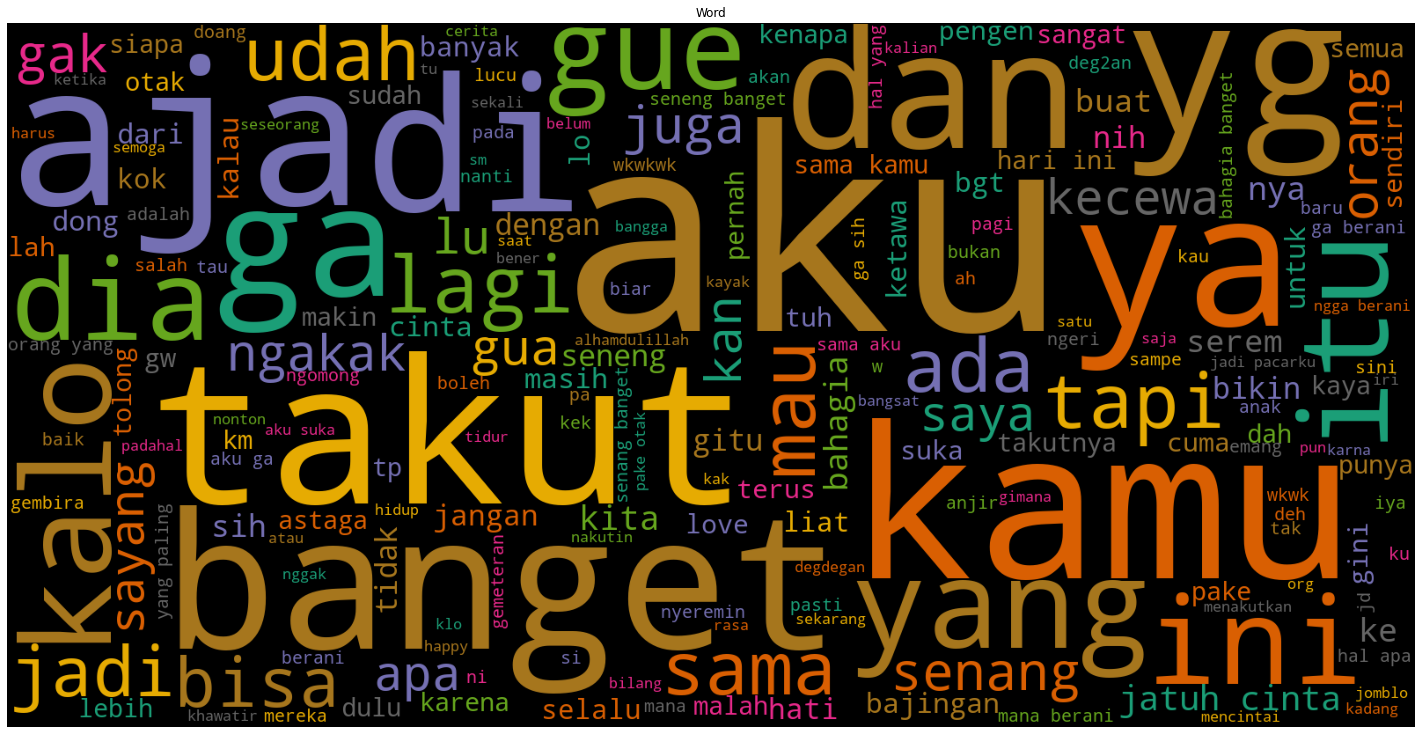

In [20]:
dat = ' '.join(word)
#data1 = dat.read()
%matplotlib inline
wordcloud = WordCloud(background_color='black', mode="RGB", width=1600, height=800, colormap="Dark2").generate(dat)
plt.figure(figsize=(20,10))
plt.title('Word')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [21]:
pd.Series(' '.join(data['text']).split()).value_counts()[:-10]

aku        498
ga         266
banget     265
yang       259
kamu       252
          ... 
sk           1
jepit        1
keroyok      1
ngomen       1
approve      1
Length: 5294, dtype: int64

In [22]:
pd.Series(' '.join(data['text-stp-nltk']).split()).value_counts()[:-10]

ga             266
banget         265
takut          188
ya             188
aja            185
              ... 
disegerakan      1
lantai           1
merawat          1
sorban           1
jokernya         1
Length: 4934, dtype: int64

In [23]:
pd.Series(' '.join(data['text-stp-sastrawi']).split()).value_counts()[:-10]

aku          498
ga           266
banget       265
kamu         252
sama         199
            ... 
pikiranku      1
naga           1
andiin         1
terbayang      1
kat            1
Length: 5191, dtype: int64

In [24]:
data['label'].value_counts()

love      814
angry     814
happy     814
afraid    814
Name: label, dtype: int64

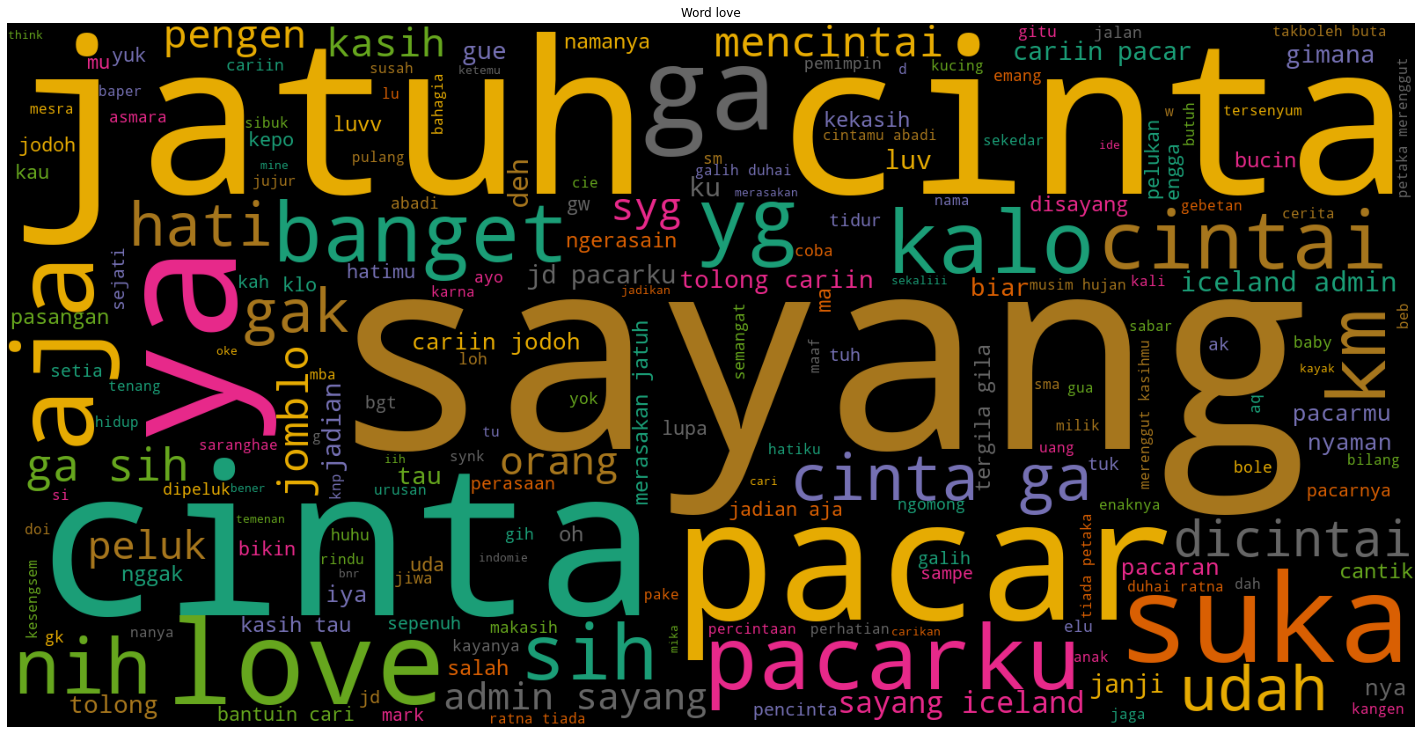

In [25]:
data_love = data.loc[(data['label'] == "love")]
word_love = pd.Series(' '.join(data_love['text-stp-nltk']).split())
dat_love = ' '.join(word_love)
#data1 = dat.read()
%matplotlib inline
wordcloud = WordCloud(background_color='black', mode="RGB", width=1600, height=800, colormap="Dark2").generate(dat_love)
plt.figure(figsize=(20,10))
plt.title('Word love')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [26]:
pd.Series(' '.join(data_love['text-stp-nltk']).split()).value_counts()[:-10]

cinta       162
sayang      129
ga           78
jatuh        72
pacar        53
           ... 
skrg          1
darimu        1
membleku      1
cerdas        1
satunya       1
Length: 1043, dtype: int64

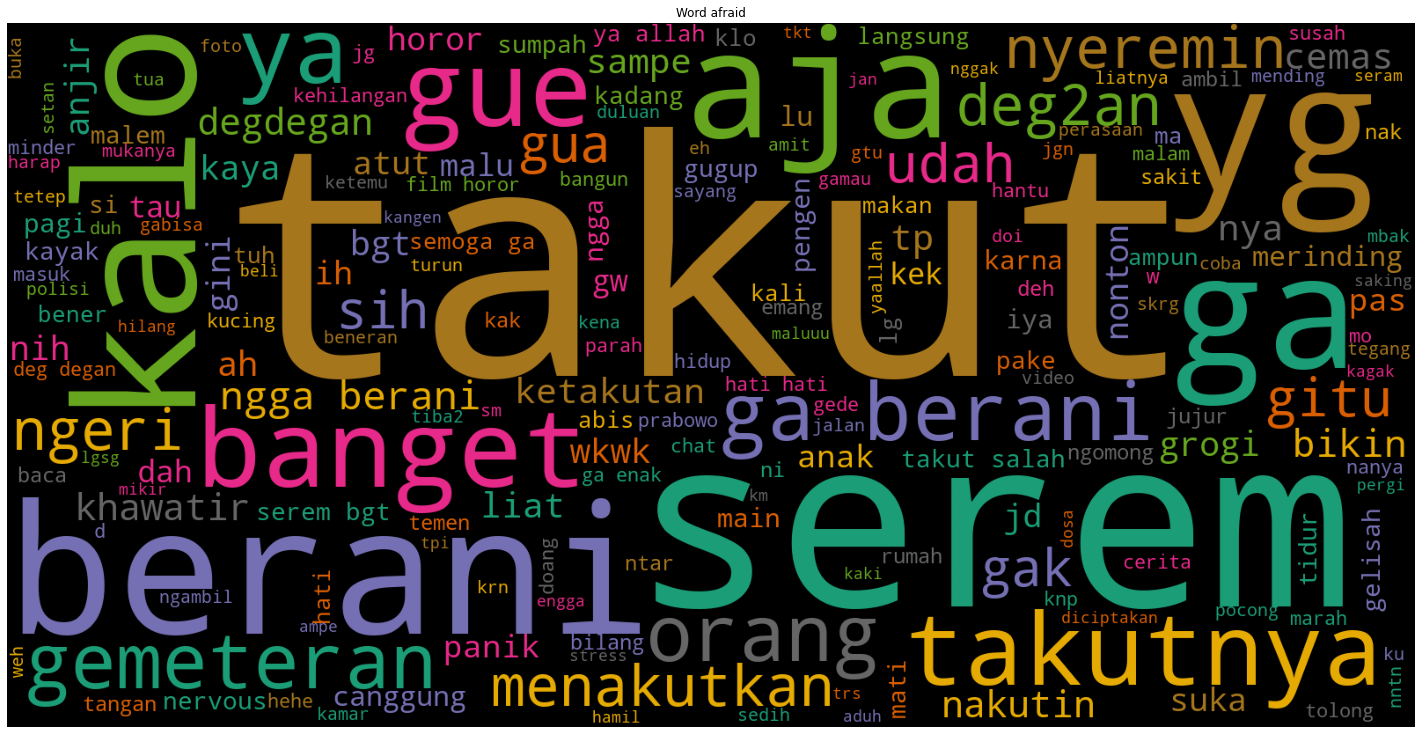

In [27]:
data_afraid = data.loc[(data['label'] == "afraid")]
word_afraid = pd.Series(' '.join(data_afraid['text-stp-nltk']).split())
dat_afraid = ' '.join(word_afraid)

%matplotlib inline
wordcloud = WordCloud(background_color='black', mode="RGB", width=1600, height=800, colormap="Dark2").generate(dat_afraid)
plt.figure(figsize=(20,10))
plt.title('Word afraid')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [28]:
pd.Series(' '.join(data_afraid['text-stp-nltk']).split()).value_counts()[:-10]

takut      184
berani     108
serem       90
ga          85
yg          55
          ... 
lawan        1
teriakk      1
kuota        1
fa           1
do           1
Length: 1777, dtype: int64

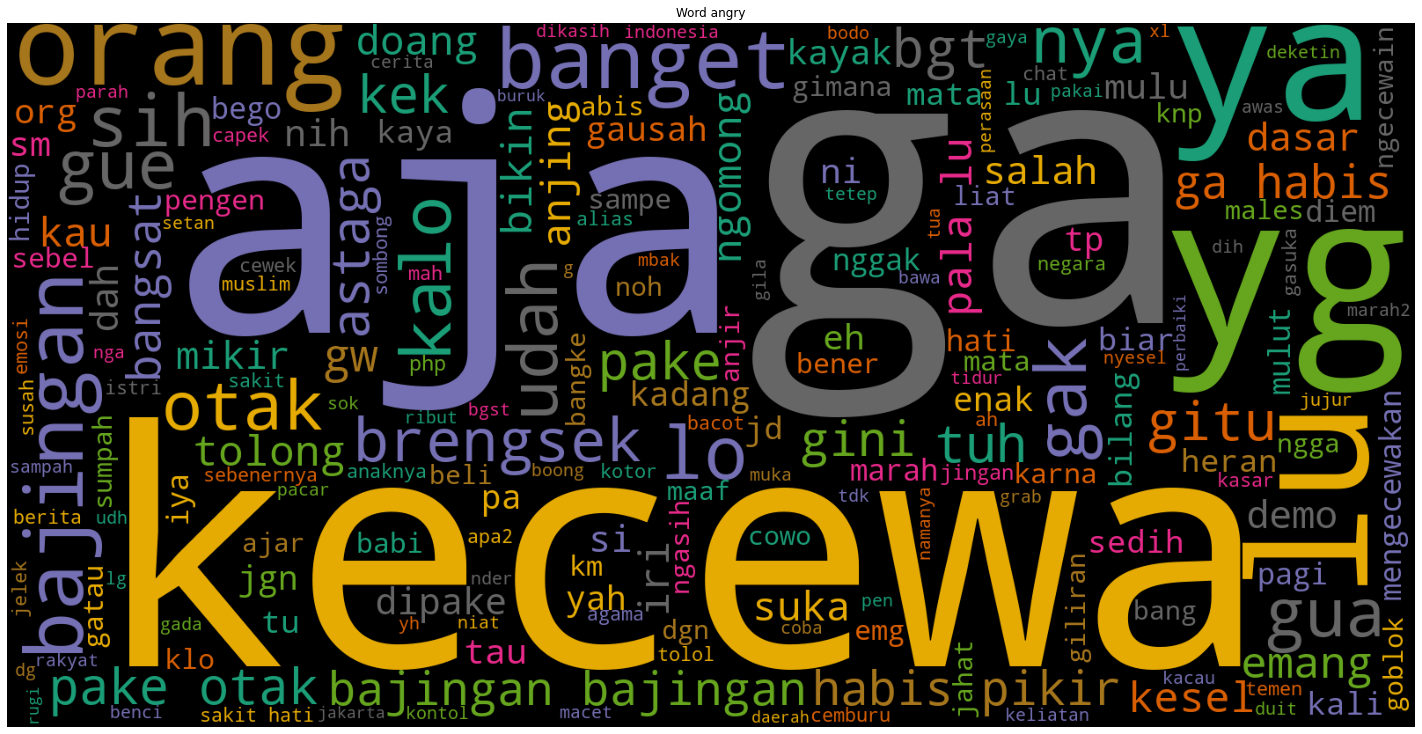

In [29]:
data_angry = data.loc[(data['label'] == "angry")]
word_angry = pd.Series(' '.join(data_angry['text-stp-nltk']).split())
dat_angry = ' '.join(word_angry)

%matplotlib inline
wordcloud = WordCloud(background_color='black', mode="RGB", width=1600, height=800, colormap="Dark2").generate(dat_angry)
plt.figure(figsize=(20,10))
plt.title('Word angry')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [30]:
pd.Series(' '.join(data_angry['text-stp-nltk']).split()).value_counts()[:-10]

ga          90
bajingan    81
lu          76
kecewa      70
aja         68
            ..
durasi       1
teknik       1
hayo         1
campur       1
ae           1
Length: 2120, dtype: int64

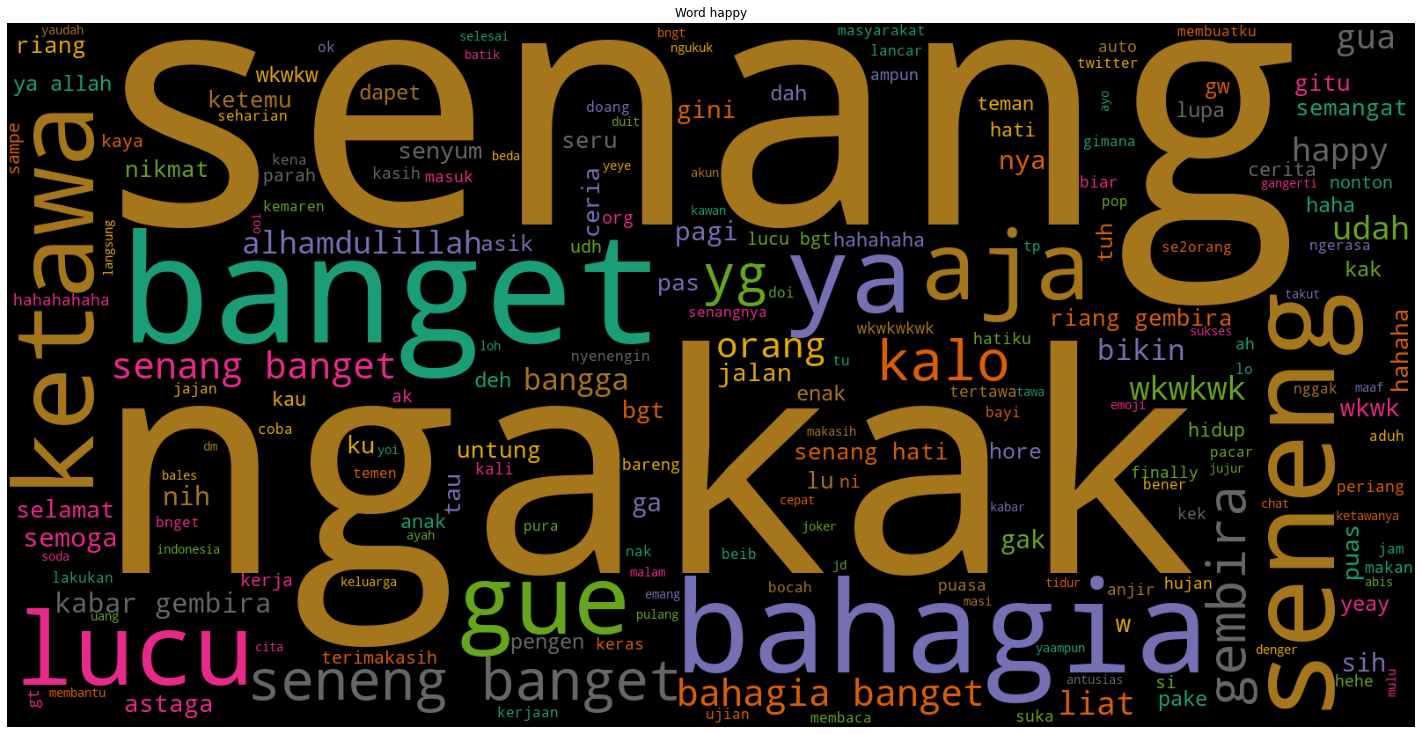

In [31]:
data_happy = data.loc[(data['label'] == "happy")]
word_happy = pd.Series(' '.join(data_happy['text-stp-nltk']).split())
dat_happy = ' '.join(word_happy)

%matplotlib inline
wordcloud = WordCloud(background_color='black', mode="RGB", width=1600, height=800, colormap="Dark2").generate(dat_happy)
plt.figure(figsize=(20,10))
plt.title('Word happy')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [32]:
pd.Series(' '.join(data_happy['text-stp-nltk']).split()).value_counts()[:-10]

banget       152
senang       135
bahagia       90
seneng        87
ngakak        79
            ... 
happiness      1
menyapaku      1
semngat        1
sambal         1
syaratnya      1
Length: 1623, dtype: int64

encoder label

In [33]:
data['fit_label'] = LabelEncoder().fit_transform(data['label'])

In [34]:
data.head()

,text,label,text-stp-nltk,text-stp-sastrawi,fit_label
0,foto nya di editin sama minta di tag tapi takut,afraid,foto nya editin tag takut,foto nya editin sama minta tag takut,0
1,kok serem ya,afraid,serem ya,kok serem,0
2,takut liat fotonya pocong,afraid,takut liat fotonya pocong,takut liat fotonya pocong,0
3,serem udah tua soalnya,afraid,serem udah tua,serem udah tua soalnya,0
4,hiiiii,afraid,hiiiii,hiiiii,0


split data train-test

In [35]:
train, test = train_test_split(data, test_size=0.2)

In [36]:
train

,text,label,text-stp-nltk,text-stp-sastrawi,fit_label
2749,aku suka sama kamu,love,suka,aku suka sama kamu,3
474,tapi belum berani ngungkapin takut doinya beru...,afraid,berani ngungkapin takut doinya berubah sikap n...,berani ngungkapin takut doinya berubah sikap...,0
2273,ku bahagia tonet tonet tonet,happy,ku bahagia tonet tonet tonet,ku bahagia tonet tonet tonet,2
3187,aku liat kmu lebih suka sahabatan sama cowo co...,love,liat kmu suka sahabatan cowo cowo iya biar kel...,aku liat kmu lebih suka sahabatan sama cowo co...,3
2593,jadi pacar aku,love,pacar,jadi pacar aku,3
...,...,...,...,...,...
1910,yaampun w ngakak dari tweet sampai isi replyan...,happy,yaampun w ngakak tweet isi replyannya kasian d...,yaampun w ngakak tweet isi replyannya kasian...,2
164,masih gerogi sampe bingung mau lewat mana,afraid,gerogi sampe bingung,gerogi sampe bingung mau lewat mana,0
2883,aku i love you aku,love,i love you,aku i love you aku,3
939,3 minggu lebih tak trainng aku main semua kela...,angry,3 minggu trainng main kelaut hm bola clear ken...,3 minggu lebih tak trainng aku main semua kela...,1


In [37]:
test

,text,label,text-stp-nltk,text-stp-sastrawi,fit_label
1253,bodoamat jir daripada jadi homo,angry,bodoamat jir homo,bodoamat jir jadi homo,1
788,kok serem ya,afraid,serem ya,kok serem,0
14,sore padaan berangkat aku makin deg2an,afraid,sore padaan berangkat deg2an,sore padaan berangkat aku makin deg2an,0
1015,guyon doang ga bisa bercanda nih,angry,guyon doang ga bercanda nih,guyon doang ga bercanda nih,1
535,gak jadi nonu ambil kemarin ngeri,afraid,gak nonu ambil kemarin ngeri,gak jadi nonu ambil kemarin ngeri,0
...,...,...,...,...,...
1906,ceria terosss,happy,ceria terosss,ceria terosss,2
2715,cinta itu sederhana yang ribet itu cuman saya,love,cinta sederhana ribet cuman,cinta sederhana ribet cuman,3
1705,happy banget,happy,happy banget,happy banget,2
688,oh karena canggung tp intinya syg bener atau c...,afraid,oh canggung tp intinya syg bener ngetik doang,canggung tp intinya syg bener cuma ngetik d...,0


Classification using SVM

In [38]:
#x_train
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(train['text'])
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

#y_train
y_list = list(train['fit_label'])
Y_train = np.array(y_list)

In [39]:
print('train data : ', X_train_tfidf.shape)
print('train label : ', Y_train.shape)

train data :  (2604, 4570)
train label :  (2604,)


In [40]:
start_time = datetime.now()

svc = SVC(kernel='linear')
svc.fit(X_train_tfidf, Y_train)

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Duration: 0:00:00.440214


In [41]:
a = count_vect.transform(test['text'])
X_test = tfidf_transformer.transform(a).toarray()
print (X_test.shape)

Y_test = list(test['fit_label'])

(652, 4570)


In [42]:
predictions_svm = svc.predict(X_test)

In [43]:
print("SVM Accuracy Score : ",accuracy_score(predictions_svm, Y_test)*100)

SVM Accuracy Score :  88.03680981595092


with stopword

In [ ]:
#x_train
count_vect = CountVectorizer()
X_train_stp_counts = count_vect.fit_transform(train['text-stp-nltk'])
tfidf_transformer = TfidfTransformer()
X_train_stp_tfidf = tfidf_transformer.fit_transform(X_train_stp_counts)

#y_train
y_list = list(train['fit_label'])
Y_train_stp = np.array(y_list)

In [ ]:
print('train data : ', X_train_stp_tfidf.shape)
print('train label : ', Y_train_stp.shape)

In [ ]:
start_time = datetime.now()

svc_stp = SVC(kernel='linear')
svc_stp.fit(X_train_stp_tfidf, Y_train_stp)

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

In [ ]:
a = count_vect.transform(test['text-stp-nltk'])
X_test_stp = tfidf_transformer.transform(a).toarray()
print (X_test_stp.shape)

Y_test_stp = list(test['fit_label'])

In [ ]:
predictions_svm_stp = svc_stp.predict(X_test_stp)

In [ ]:
print("SVM Accuracy Score : ",accuracy_score(predictions_svm_stp, Y_test_stp)*100)

predict

In [ ]:
len (kata_kunci)

In [ ]:
test_twitter = kata_kunci[13:23]
test_twitter

In [ ]:
data_twitter = pd.DataFrame(test_twitter,columns=['text'])
data_twitter

In [ ]:
data_twitter['text'] = data_twitter['text'].apply(lambda x: x.lower())
data_twitter['text'] = data_twitter['text'].apply(lambda x: re.sub("@\S+", " ", x))
data_twitter['text'] = data_twitter['text'].apply(lambda x: re.sub("https*\S+", " ", x))
data_twitter['text'] = data_twitter['text'].apply(lambda x: re.sub("#\S+", " ", x))
list(data_twitter.text)

In [ ]:
data_twitter['text'] = data_twitter['text'].str.replace('\s+',' ')
data_twitter['text'] = data_twitter['text'].str.replace('[^\w\s-]','')
data_twitter['text'] = data_twitter['text'].apply(lambda x: "".join(x.rstrip().lstrip()))

In [ ]:
list(data_twitter.text)

In [ ]:
def predict (i):
    a = count_vect.transform([i])
    X_coba = tfidf_transformer.transform(a).toarray()
    y_pred = svc_stp.predict(X_coba)
    return (y_pred[0])

def predict_stp (i):
    a = count_vect.transform([i])
    X_coba = tfidf_transformer.transform(a).toarray()
    y_pred = svc_stp.predict(X_coba)
    return (y_pred[0])

def change_label (input_label):
    if input_label== 0 :
        label = 'affraid'
    elif input_label== 1 :
        label = 'angry'
    elif input_label == 2 :
        label = 'happy'
    else :
        label = 'love'
    
    return (label)

In [ ]:
data_twitter['label'] = data_twitter['text'].apply(lambda x: change_label(predict(x)) )

with stopword

In [ ]:
data_twitter['text-stp-nltk'] = data_twitter['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [ ]:
list_stop_new = ['null']

In [ ]:
data_twitter['label-stp'] = data_twitter['text-stp-nltk'].apply(lambda x: change_label(predict_stp(x)))

In [ ]:
data_twitter

# thank you